In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv('train.csv')
df.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel,Best_Offer
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent,1
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,SUV,Small,5,2,0,1,Personal,P_L2,Agent,3
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent,0
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch,1
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center,3


In [3]:
df.isnull().sum()

Customer_ID                      0
Sex                              0
Earnings                         0
Region_Code                      0
Marital Status                   0
State_of_Origin                  0
Customer_Worth                   0
Customer_Reply                   0
Plan                             0
Certification                    0
Effective To Date                0
Status_of_Employment             0
Premium_Auto_per_Month           0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Months Since Last Claim          0
Months Since Policy Inception    0
Counts_of_Open_Complaints        0
No_Of_POlicy                     0
kind_of_policy                   0
Active_Policy                    0
Sales Channel                    0
Best_Offer                       0
dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

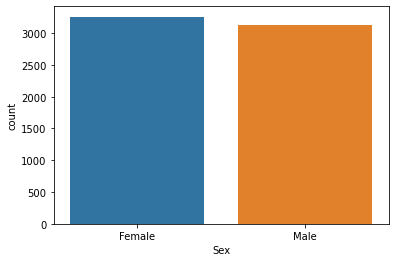

In [4]:
sns.countplot('Sex',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kind_of_policy', ylabel='count'>

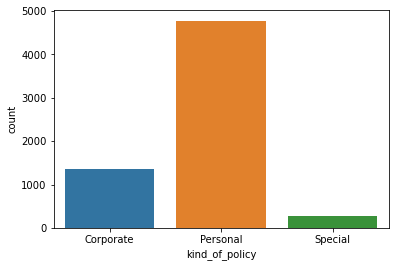

In [5]:
sns.countplot('kind_of_policy',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Customer_Reply', ylabel='count'>

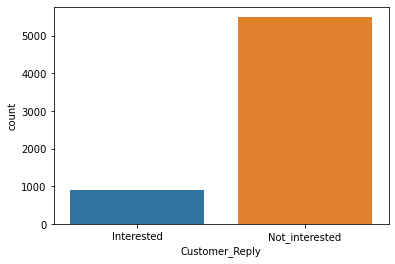

In [6]:
sns.countplot('Customer_Reply',data=df)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sales Channel', ylabel='count'>

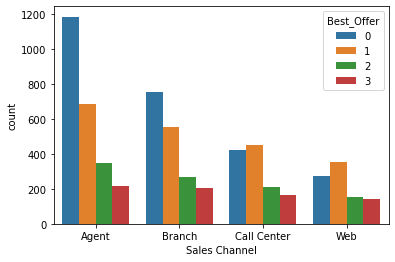

In [7]:
sns.countplot('Sales Channel',hue='Best_Offer',data=df)

In [8]:
#Now seperate the dataset as response variable and feature variables
x = df.drop('Best_Offer', axis = 1)
y = df['Best_Offer']
x.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel
0,Customer_434,Female,97134,Suburban,Single,Kano,5017.009472,Interested,Silver,First_Degree,...,624.000000,SUV,Medsize,12,15,0,1,Corporate,C_L2,Agent
1,Customer_4641,Female,53754,Suburban,Married,Abuja,5151.301306,Not_interested,Silver,First_Degree,...,628.800000,SUV,Small,5,2,0,1,Personal,P_L2,Agent
2,Customer_4952,Female,25804,Suburban,Divorced,Lagos,4906.894731,Interested,Silver,HND,...,667.200000,Sports Car,Medsize,3,51,0,1,Personal,P_L3,Agent
3,Customer_1489,Female,0,Suburban,Single,Imo,8512.525936,Not_interested,Silver,HND,...,871.200000,Sports Car,Medsize,5,94,0,8,Personal,P_L2,Branch
4,Customer_812,Male,140494,Rural,Single,Imo,3280.531880,Not_interested,Silver,PHD,...,141.799422,Four-Door Car,Medsize,13,19,2,1,Personal,P_L2,Call Center


In [34]:
x=x.apply(LabelEncoder().fit_transform)
#x=x.drop(columns=['Region_Code','Vehicle Class'])
x.head()

,Customer_ID,Sex,Earnings,Region_Code,Marital Status,State_of_Origin,Customer_Worth,Customer_Reply,Plan,Certification,...,Total Claim Amount,Vehicle Class,Vehicle Size,Months Since Last Claim,Months Since Policy Inception,Counts_of_Open_Complaints,No_Of_POlicy,kind_of_policy,Active_Policy,Sales Channel
0,2584,0,2093,1,2,3,2128,0,2,0,...,2893,3,1,12,15,0,0,0,1,0
1,2813,0,877,1,1,0,2245,1,2,0,...,2903,3,2,5,2,0,0,1,4,0
2,3050,0,67,1,0,4,2024,0,2,1,...,2993,4,1,3,51,0,0,1,5,0
3,363,0,0,1,2,2,4078,1,2,1,...,3307,4,1,5,94,0,7,1,4,1
4,5522,1,3089,0,2,2,1032,1,2,3,...,826,0,1,13,19,1,0,1,4,2


In [35]:
#Train and Test splitting of data 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =20)



In [36]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


## RANDOM FOREST

In [37]:
from sklearn.ensemble import RandomForestClassifier

#rfc = RandomForestClassifier(n_estimators=400)
rfc=RandomForestClassifier(n_estimators=1000, criterion='gini', max_depth=None,min_samples_split=2, 
                       min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None,
                       bootstrap=True, oob_score=False, n_jobs=1, random_state=20, verbose=0, 
                       warm_start=False,class_weight=None)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


In [38]:
#viewing how our model performed

print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.55      0.87      0.68       523
           1       0.56      0.61      0.58       405
           2       0.38      0.01      0.03       204
           3       0.33      0.01      0.03       147

    accuracy                           0.55      1279
   macro avg       0.45      0.38      0.33      1279
weighted avg       0.50      0.55      0.47      1279



In [39]:
#Confusion matrix for the random forest classification
print(confusion_matrix(y_test, pred_rfc))

[[453  69   1   0]
 [149 249   3   4]
 [140  61   3   0]
 [ 76  68   1   2]]


In [40]:
from sklearn.metrics import accuracy_score
cm = accuracy_score(y_test, pred_rfc)

cm

0.5527756059421423

## LINEAR SVM

In [41]:
# from sklearn import svm
# clf_svm=svm.SVC(kernel='linear')
# clf_svm.fit(X_train,y_train)
# pred_svm = rfc.predict(X_test)

#x_test[0]

In [42]:
#clf_svm.score(X_test,y_test)

## LOGISTIC

In [43]:
# from sklearn.linear_model import LogisticRegression
# clf_log=LogisticRegression()
# clf_log.fit(X_train,y_train)
# clf_log.predict(X_test)
# #pred_rfc = rfc.predict(X_test)


In [44]:
#print(classification_report(y_test, pred_rfc))

In [45]:
#clf_log.score(X_test,y_test)

In [46]:
test = pd.read_csv('test.csv')
test.isnull().sum()

Customer_ID                      0
Sex                              0
Earnings                         0
Region_Code                      0
Marital Status                   0
State_of_Origin                  0
Customer_Worth                   0
Customer_Reply                   0
Plan                             0
Certification                    0
Effective To Date                0
Status_of_Employment             0
Premium_Auto_per_Month           0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
Months Since Last Claim          0
Months Since Policy Inception    0
Counts_of_Open_Complaints        0
No_Of_POlicy                     0
kind_of_policy                   0
Active_Policy                    0
Sales Channel                    0
dtype: int64

In [47]:


test=test.apply(LabelEncoder().fit_transform)

ynew = rfc.predict(test)
print(ynew)

[0 0 0 ... 0 0 0]


In [2]:
df = pd.DataFrame(ynew,
             columns=['Best_offer'])

NameError: name 'pd' is not defined

In [49]:
df.to_csv('sample.csv')